## Importing Essential Libraries and Reading the CSV File.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'E:\Learning Data Science With Python\Data Science 104 - Machine Learning Models\Data Science 104 - KMeans Clustering\Segmentation - KMeans.csv')

## Checking the first few rows of the data, understanding the dataset, datatypes, missing values, etc.

In [3]:
df.head()

,Age,Gender,Purchase_Value
0,30,F,5967
1,57,M,1735
2,38,F,2822
3,40,F,1592
4,26,F,8823


In [4]:
df.isna().sum()

Age               0
Gender            0
Purchase_Value    0
dtype: int64

In [5]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
dtype: bool

In [6]:
df.describe()

,Age,Purchase_Value
count,19.000000,19.000000
mean,43.315789,5309.263158
std,16.190027,2971.795190
min,22.000000,524.000000
25%,29.500000,3014.500000
50%,40.000000,4811.000000
75%,58.500000,8109.000000
max,71.000000,9896.000000


## Starting K-Means Clustering.

* K-Means is a very popular method used for clustering.
* It is one of the simplest and most effective tools for customer segmentation.
* The idea is to find centroids and place them in the center of a particular cluster.
* To find the perfect number of clusters, one can use the elbow method. (Calculate Inertia)

### Selecting the features.

* For the first iteration of the KMeans Clustering, let us take only 'Age' and 'Purchase_Value' columns.
* We will assign it to the x variable.

In [8]:
x = df[['Age', 'Purchase_Value']]

In [9]:
x.head()

,Age,Purchase_Value
0,30,5967
1,57,1735
2,38,2822
3,40,1592
4,26,8823


### Elbow Method

* We use the elbow method to identify the appropriate number of clusters for our dataset.
* It calculates the 'WCSS' which is the 'Within Cluster Sum of Squares'
* Ideally, we will choose the point where the bend starts to decrease in a 'linear' fashion.

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state = 30)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

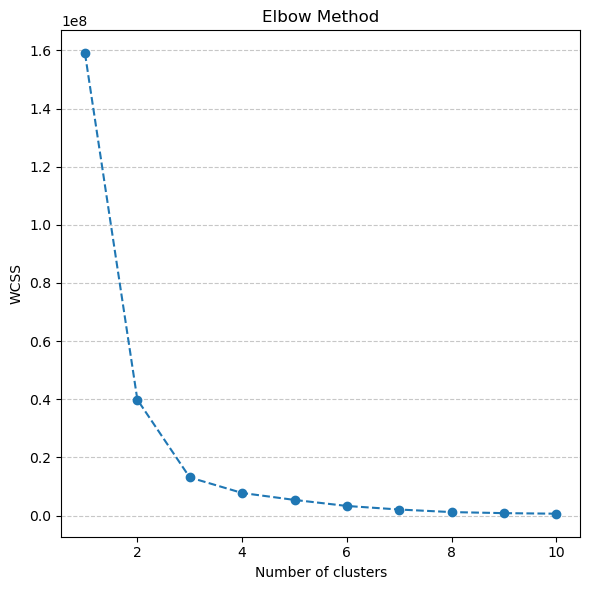

In [15]:
plt.figure(figsize=(6,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.grid(axis='y', alpha=0.7, linestyle='--')
plt.show()

### Selecting 'k' value and Visualizing the clusters.

* We will now proceed to select the 'k' value.
* In this example, the appropriate value for 'k' would be 3. Because after the 3rd cluster, the line begins to decrease in a linear fashion.
* We will also try and understand what happens if the value of 'k' is 4.
<br></br>
* We will then assign the clusters to our respective rows in the dataframe.
* After this, we will visualize the clusters on a scatter plot.

In [16]:
km = KMeans(n_clusters = 3)
clusters = km.fit_predict(x)

In [17]:
clusters

array([0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2])

In [18]:
df['Cluster'] = clusters

In [19]:
df.head()

,Age,Gender,Purchase_Value,Cluster
0,30,F,5967,0
1,57,M,1735,1
2,38,F,2822,1
3,40,F,1592,1
4,26,F,8823,2


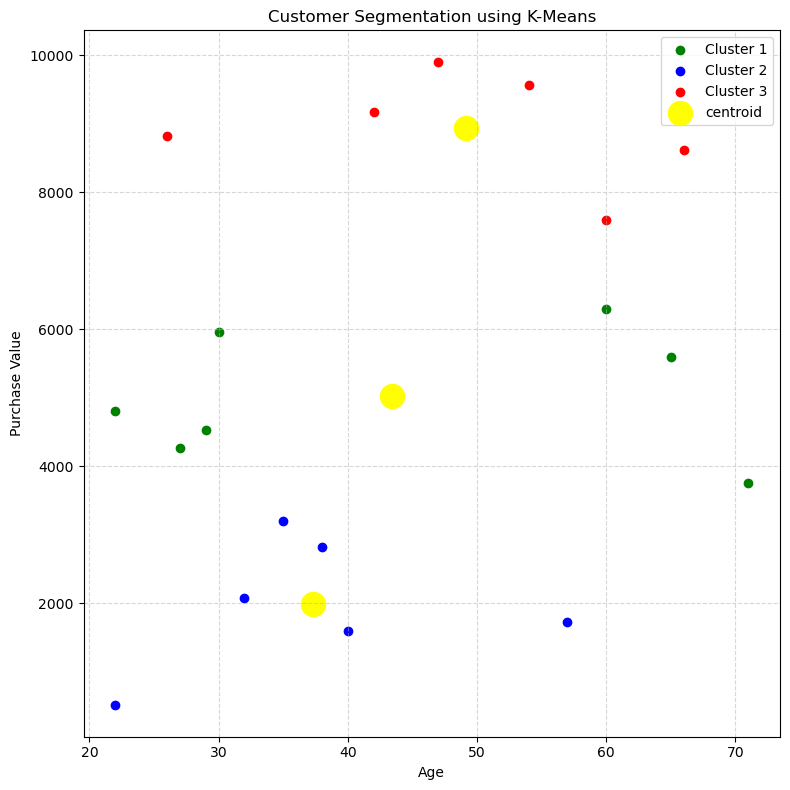

In [40]:
c1 = df[df.Cluster==0]
c2 = df[df.Cluster==1]
c3 = df[df.Cluster==2]

plt.figure(figsize=(8,8))

plt.scatter(c1['Age'], c1['Purchase_Value'], color='green', label='Cluster 1')
plt.scatter(c2['Age'], c2['Purchase_Value'], color='blue', label='Cluster 2')
plt.scatter(c3['Age'], c3['Purchase_Value'], color='red', label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='yellow', s=300, marker='o', label='centroid')

plt.grid(linestyle='--', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Purchase Value')
plt.title('Customer Segmentation using K-Means')

plt.legend(loc='best')

plt.tight_layout()
plt.show()

## Insights

* So, we can observe that the clusters have been prepared and the customers have been segmented appropriately.
* We can name the segments according to our convenience.
* In this particular dataset, the 3 clusters can be: i) Low Spending Customers(Blue), ii) Medium Spending Customers(Green), iii) High Spending Customers(Red).
* Based on this information, we can conduct appropraite marketing campaigns, effective discount solutions, etc.
* If we get future data on other customers, we can segment them accordingly and use that information to make the most out of the situation.

### Predictions

* We will create a dummy array with 'Age' and 'Purchase Value' values.
* We will label our clusters
* We will predict the dummy data using the model we created earlier and print what cluster they belong to.

In [25]:
cluster_labels = ['Medium Spending Customers',
                  'Low Spending Customers',
                  'High Spending Customers']

dummy_data = np.array([[43, 6410],
                      [55, 3774],
                      [37, 8120],
                      [25, 6549],
                      [63, 2147]])

dummy_clusters = km.predict(dummy_data)

for i in range(len(dummy_data)):
    print(f"Data Point {i+1} belongs to: {cluster_labels[dummy_clusters[i]]}")

Data Point 1 belongs to: Medium Spending Customers
Data Point 2 belongs to: Medium Spending Customers
Data Point 3 belongs to: High Spending Customers
Data Point 4 belongs to: Medium Spending Customers
Data Point 5 belongs to: Low Spending Customers


### Visualizing the predictions

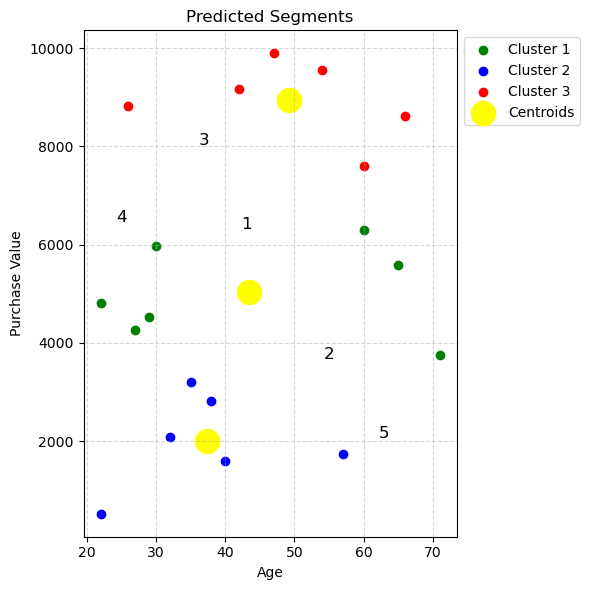

In [64]:
plt.figure(figsize=(6,6))

for i in range(len(dummy_data)):
    plt.scatter(dummy_data[i, 0], dummy_data[i, 1], marker='', color='black')
    plt.text(dummy_data[i, 0], dummy_data[i, 1], str(i+1), fontsize=12, ha='center', va='center')
    

plt.scatter(c1['Age'], c1['Purchase_Value'], color='green', label='Cluster 1')
plt.scatter(c2['Age'], c2['Purchase_Value'], color='blue', label='Cluster 2')
plt.scatter(c3['Age'], c3['Purchase_Value'], color='red', label='Cluster 3')
    
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='yellow', marker='o', s=300, label='Centroids')

    
plt.xlabel('Age')
plt.ylabel('Purchase Value')
plt.title('Predicted Segments')

plt.legend(bbox_to_anchor=(1,1))

plt.grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()